In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [58]:
df_train = pd.read_csv('blackfriday_train.csv')
df_test = pd.read_csv('blackfriday_test.csv')
#combine both datasets

df = df_train.append(df_test)

In [59]:
df.shape

(783667, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [61]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [62]:
#drop userid as it is not in used
df.drop(['User_ID'],axis=1,inplace=True)

In [63]:
#Handling categorical features
df['Gender'] = df['Gender'].map({'F':0, "M":1})


In [64]:
print(df.Age.unique())
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [65]:
print(df.City_Category.unique())
df_city = pd.get_dummies(df['City_Category'],drop_first =True)
df = pd.concat([df,df_city],axis=1)
df.drop(['City_Category'],axis=1,inplace=True)

['A' 'C' 'B']


In [66]:
#Replacing Missing values with mode as features are discrete
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [67]:
df['Product_Category_3'].unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [68]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\1824306\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [69]:
#convert objects into integers

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)
df['Gender'] = df['Gender'].astype(int)

In [70]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


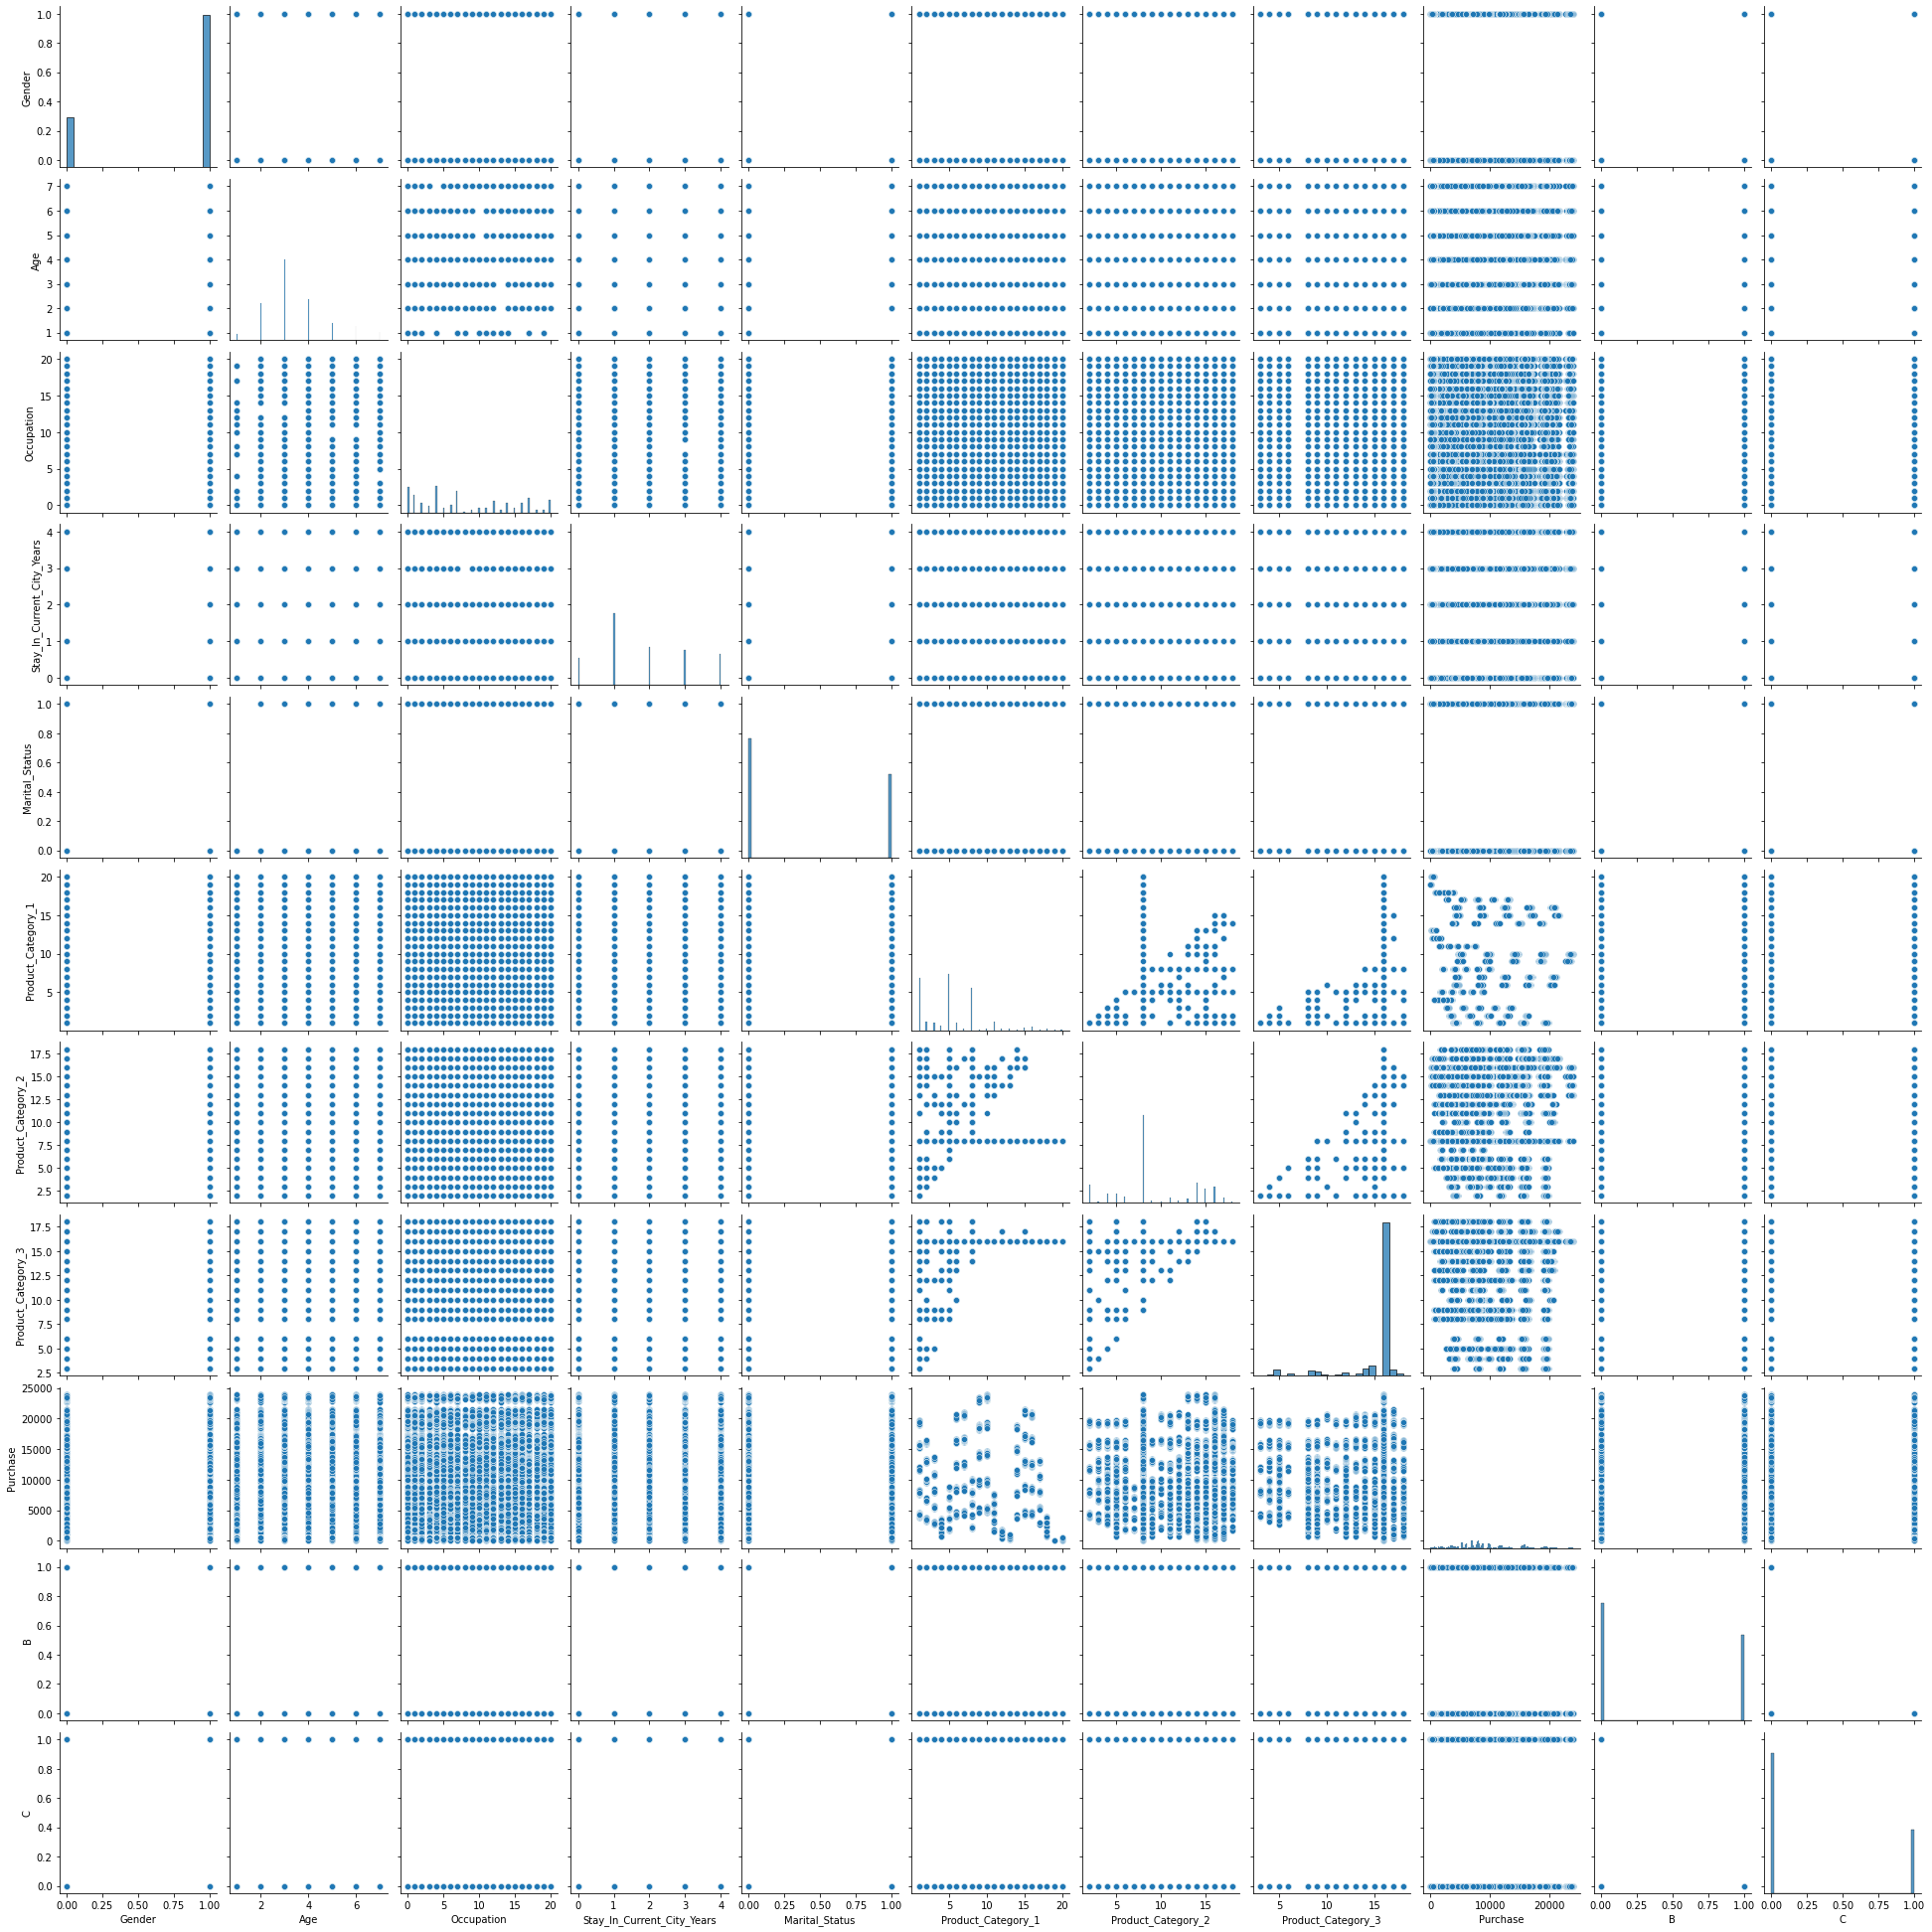

In [71]:
sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

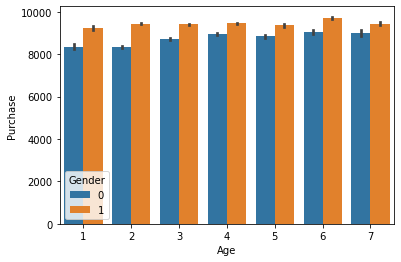

In [76]:
sns.barplot(x = 'Age',y = 'Purchase',hue='Gender',data=df)

# Observation
1. Purchasing percentage of men over women is high

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

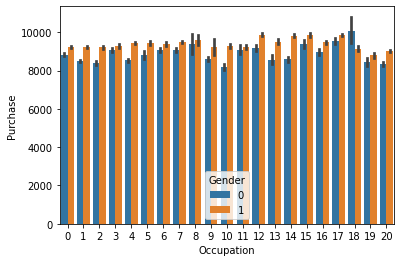

In [77]:
sns.barplot(x = 'Occupation',y = 'Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

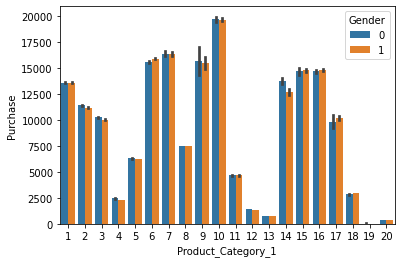

In [79]:
sns.barplot(x = 'Product_Category_1',y = 'Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

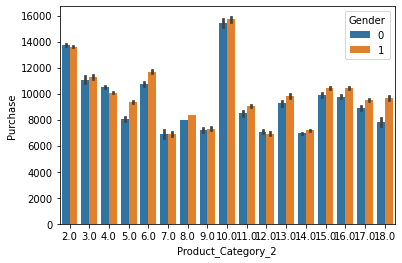

In [80]:
sns.barplot(x = 'Product_Category_2',y = 'Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

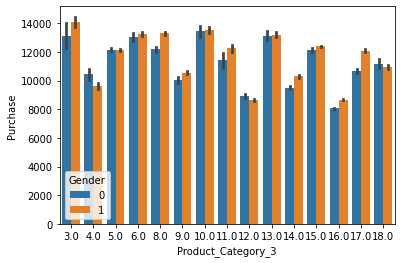

In [81]:
sns.barplot(x = 'Product_Category_3',y = 'Purchase',hue='Gender',data=df)

In [97]:
#Feature scaling
df_train = df[~df['Purchase'].isnull()]
df_test = df[df['Purchase'].isnull()]

X = df_train.drop(['Product_ID','Purchase'],axis=1)
y = df_train['Purchase']

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
Std = StandardScaler()
x_train,x_test, y_train,y_test =train_test_split(X,y,test_size=0.03,random_state=0 )

In [100]:
X_train = Std.fit_transform(x_train)
X_test = Std.transform(x_test)